In [ ]:
#import Qiskit
import numpy as np

# Import Qiskit with all its dependencies

!pip install qiskit[all]

#for some reason Aer is not pulled in from the [all]
!pip install qiskit-aer



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 31.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 63.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.5/29.5 MB 40.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 541.5/541.5 kB 26.5 MB/s eta 0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=d38c7076b3341c94bb13287a43c8a38529ceece054d5b24592d36d4e2f11b7c0
  Stored in directory: /root/.cache/pip/wheels/b1/7a/33/9fdd892f784ed4afda62b685ae3703adf4c91aa0f524c28f03
  Created wheel for p

In [ ]:
from qiskit_aer import Aer
# Aer is a module in Qiskit that provides high-performance quantum simulation
# tools. It enables you to simulate the behavior of quantum circuits without
# requiring access to a physical quantum computer. This is particularly useful
# for development, debugging, and testing quantum algorithms.

from qiskit import QuantumCircuit, transpile

from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram, plot_state_city
import qiskit.quantum_info as qi

In [ ]:
simulator = AerSimulator() #creating an AerSimulator instance
simulator.available_devices()  #Return the available simulation devices.
simulator.available_methods() #Return the available simulation methods.

('automatic',
 'statevector',
 'density_matrix',
 'stabilizer',
 'matrix_product_state',
 'extended_stabilizer',
 'unitary',
 'superop')

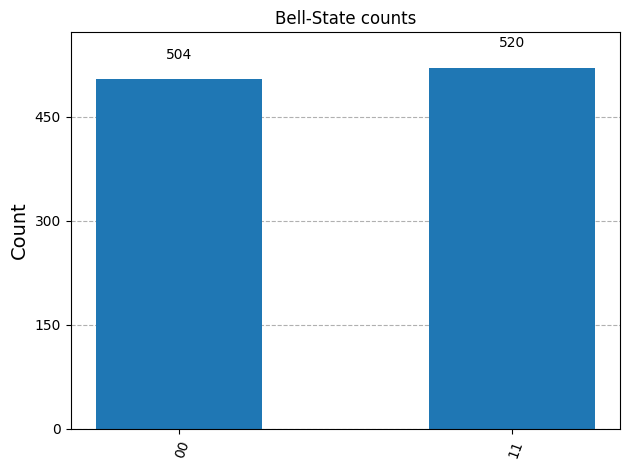

In [ ]:
# Create circuit

# Initialize a quantum circuit with 2 qubits (quantum bits) and 2 classical bits
# by default (for storing measurement results).
circ = QuantumCircuit(2)

#Apply a Hadamard gate to the first qubit (𝑞0), creating a superposition
circ.h(0) #circ.h(0)

# Apply a CNOT (Controlled NOT) gate, using the first qubit as the control and
# the second qubit
circ.cx(0, 1)


# Adds measurement operations to both qubits, storing the results in classical
# bits.
circ.measure_all()


# Transpile for simulator
# This is a high-performance simulator from Qiskit Aer for running quantum
# circuits on classical hardware.
simulator = AerSimulator()

# Optimizes the quantum circuit for the specific simulator. This step adapts the
# circuit to match the simulator's capabilities, ensuring efficient execution.
circ = transpile(circ, simulator)

# Run and get counts
result = simulator.run(circ).result()
counts = result.get_counts(circ)

#This checks whether the measurement results dictionary (counts) contains keys for both "00" and "11".
#'00' in counts: Ensures that the outcome "00" was observed in the simulation results.
# '11' in counts:#Ensures that the outcome "11" was observed in the simulation
# results. for a correct Bell state, the outcomes should only include "00" and
# "11". This assertion ensures the simulation is producing the expected outcomes
assert '00' in counts and '11' in counts

# This checks that the number of occurrences (counts) for "00" and "11" are both
# greater than 400.
assert counts['00'] > 400 and counts['11'] > 400 # Roughly 50% each
plot_histogram(counts, title='Bell-State counts')